In [1]:
from Preprocessing import *

Device available:  cuda


In [2]:
train_transform

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomCrop(size=(32, 32), padding=4)
    RandomGrayscale(p=0.1)
    ToTensor()
    Normalize(mean=[0.4911, 0.4821, 0.4465], std=[0.247, 0.2434, 0.2616])
)

In [3]:
model = efficientnet_b0(weights='DEFAULT')
model.features[0][0].stride = (1,1)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
model.classifier=nn.Sequential(
        nn.Dropout(p=0.3),
        nn.Linear(model.classifier[1].in_features, 10)
    )
model.to(device)
model.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=False)
  (1): Linear(in_features=1280, out_features=10, bias=True)
)

In [5]:
loss_project = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(),lr = LR,weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-5)

In [ ]:
model_trainer = ModelTrainer(model, train_data=train_data,val_data=val_data,loss_function=loss_project, optimizer=optimizer, scheduler=scheduler)
model_trainer.train(EPOCHS,n_models=N_Models,save='Experiments/'+file_name+'.txt')
     

||||||||||

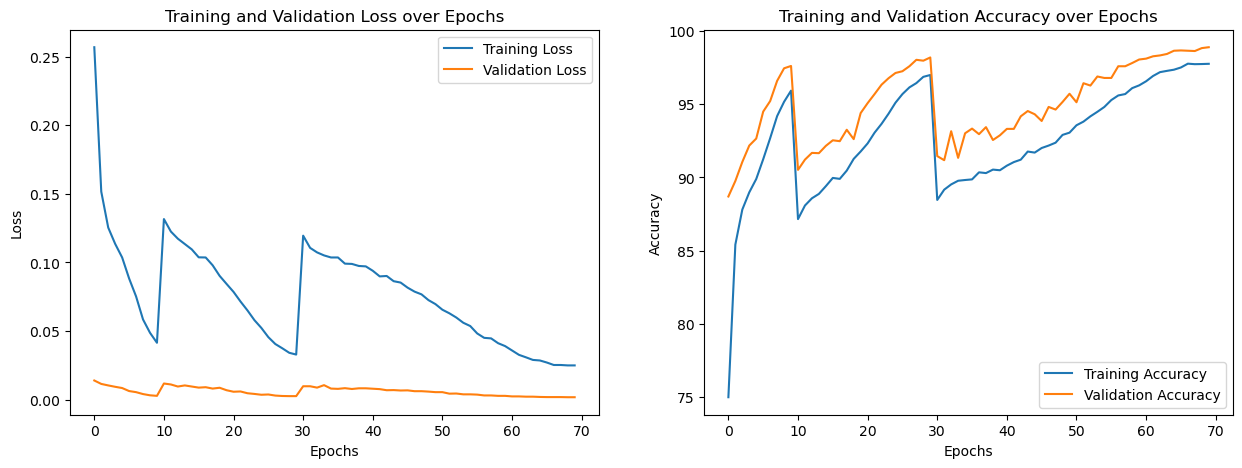

In [ ]:
model_trainer.plot_metrics('Experiments/'+file_name+'.png')

In [ ]:
torch.save(model.state_dict(), file_name + ".pth")